In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load data and clean it

In [0]:
#for google colab only:
# from google.colab import files
# uploaded = files.upload() 
# import io
# df = pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), sep=',', 
#                   names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
#                          "thalach", "exang", "oldpeak", "slope", "ca", "thal",
#                          "num"], na_values="?")
# df.info()

In [33]:
#for jupyter notebooks only:
df = pd.read_csv("processed.cleveland.data", index_col=None, header=None, names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                         "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                         "num"], na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


__There are 6 nan entries: 4x nan in ca column and 2x nan in thal column. Handle nan entries.__<br>
Replace by values without any meaning (outside of defined value range)?<br>
For example:
- ca: nan -> -1 
- thal: nan -> -1 <br>

Since only 4 and 2 values are nan respecitvely, which are 1.9% of the data set, we can delete these subjects from the table

In [34]:
df.dropna(inplace=True)
df.isnull().values.any()

False

__Now check if value range, type and fromat correspond to data description for all categories:__
- age: in years
- sex: (1 = male; 0 = female)
- cp: chest pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo (month of exercise ECG reading)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: exercise thallium scintigraphic defects
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversible defect
- num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


__Look at value sets__

In [37]:
for elem in df.columns:
    print(elem+':')
    print(set(df[elem].values))
    print('----')

age:
{29.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 74.0, 76.0, 77.0}
----
sex:
{0.0, 1.0}
----
cp:
{1.0, 2.0, 3.0, 4.0}
----
trestbps:
{128.0, 129.0, 130.0, 132.0, 134.0, 135.0, 136.0, 138.0, 140.0, 142.0, 144.0, 145.0, 146.0, 148.0, 150.0, 152.0, 154.0, 155.0, 156.0, 158.0, 160.0, 164.0, 165.0, 170.0, 172.0, 174.0, 178.0, 180.0, 192.0, 200.0, 94.0, 100.0, 101.0, 102.0, 104.0, 105.0, 106.0, 108.0, 110.0, 112.0, 114.0, 115.0, 117.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0}
----
chol:
{564.0, 126.0, 131.0, 141.0, 149.0, 157.0, 160.0, 164.0, 166.0, 167.0, 168.0, 169.0, 172.0, 174.0, 175.0, 176.0, 177.0, 178.0, 180.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 192.0, 193.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0

__Encode num as categorical__:<br>
- presence = 1 (for values 1,2,3,4)
- absence = 0 (for value 0)

In [38]:
df['num'][df['num'] >= 1] = 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


__Convert float to int__<br>
See which columns can be changed to datatype int64; then change float to int for all possible cases.<br>

In [39]:
for col in df.columns.values.tolist():
    if df[col].dtype == np.float64:
        print(col + "\t: " + str(df[col].apply(float.is_integer).all()))
    else:
        print(col + "\t: " + str(df[col].dtype))

age	: True
sex	: True
cp	: True
trestbps	: True
chol	: True
fbs	: True
restecg	: True
thalach	: True
exang	: True
oldpeak	: False
slope	: True
ca	: True
thal	: True
num	: int64


In [0]:
for col in df.columns.values.tolist():
    if df[col].dtype == np.float64 and df[col].apply(float.is_integer).all():
        df[col] = df[col].astype('int64')

## Data inspection
__See how each attribute is correlated with the target field__<br>
Most attributes are moderately strong correlated with the presence/absence of CAD.

In [41]:
corr = df.corr()['num'].abs().sort_values()
corr

fbs         0.003167
chol        0.080285
trestbps    0.153490
restecg     0.166343
age         0.227075
sex         0.278467
slope       0.333049
cp          0.408945
exang       0.421355
thalach     0.423817
oldpeak     0.424052
ca          0.463189
thal        0.526640
num         1.000000
Name: num, dtype: float64

__Comparison between people with and without heart disease__<br>
1. How is each attribute related to heart disease?
2. Why can these attributes be used to diagnose heart disease?

In [0]:
# Helper function for plotting side by side
def sideplot(df, col, kind="bar", title=None):
    assert kind in ["bar", "hist"]
    fig = plt.figure(figsize=(10, 6))
    if kind == "bar":
        ax1 = plt.subplot(2, 2, 1)
        df[df.num == 1][['num', col]].groupby(col).count().plot(kind='bar', rot=0, legend=False, ax=ax1, color="#268bd2")
        plt.xlabel(col+" with CAD")
        ax2 = plt.subplot(2, 2, 2)
        df[df.num == 0][['num', col]].groupby(col).count().plot(kind='bar', rot=0, legend=False, ax=ax2, color="#268bd2")
        plt.xlabel(col+" without CAD")
    else:
        ax1 = plt.subplot(2, 2, 1)
        plt.hist(df[df.num == 1][col], color="#268bd2")
        plt.xlabel(col+" with CAD")
        ax2 = plt.subplot(2, 2, 2)
        plt.hist(df[df.num == 0][col], color="#268bd2")
        plt.xlabel(col+" without CAD")
    # Re-adjusting
    ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
    xlim = (min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1]))
    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)
    if title is not None:
        fig.suptitle(title)
    #plt.subplots_adjust(top=0.99)

__Fasting Blood Sugar__<br>
Fasting blood sugar is an important feature for measuring diabetes.
Though it is not directly related to heart diseases, It is pointed out that people with diabetes have a higher epidemiological estimate lifetime risk (LTR) of chronical heart disease1.

Jin C2 finds out that the trajectories of fasting blood sugar are significantly associated with the risk of myocardio infarction. Since we only have a single value instead of continuous data, it does not look quite useful here to analyse heart disease.

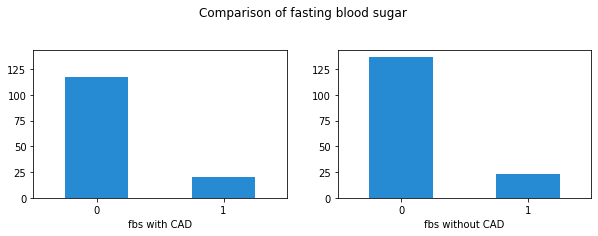

In [43]:
sideplot(df, "fbs", kind="bar", title="Comparison of fasting blood sugar")

__Serum cholesterol__<br>
People who have higher cholesterol in their blood (or hypercholesterolemia) are more likely to have their blood vessels narrowed with more cholesterol (mostly LDL cholesterol) precipited, which is known as atherosclerosis.

Coronary heart disease, which is one of the most common heart diseases, comes from lack of blood supply for the heart because of atherosclerosis of coronary arteries.

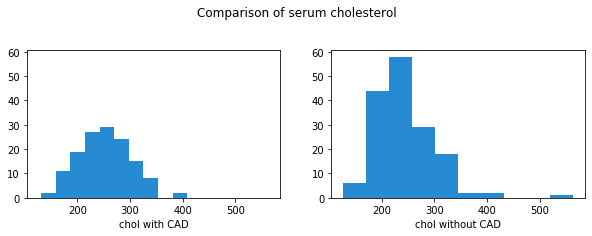

In [44]:
sideplot(df, "chol", kind="hist", title="Comparison of serum cholesterol")

__Resting electrocardiohraphic results__<br>
In ECG, all the three ST-T wave abnormality mentioned (T wave inversion; ST elevation; ST depression of greater than 0.05 mV) are possible signs of myo infarction.
T wave inversion is a sign of lacking blood in endocardium, while ST abnomality indicates there are some damage to the myocardium due to lack of blood for a relatively long period of time.

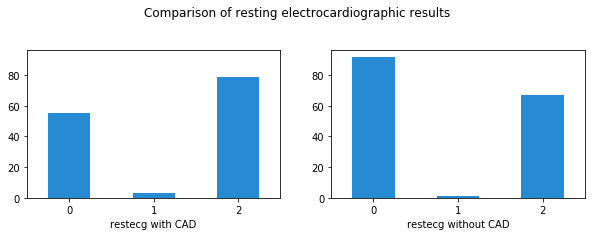

In [45]:
sideplot(df, "restecg", kind="bar", title="Comparison of resting electrocardiographic results")

__Resting blood pressure__
<br> In most countries, the normal blood pressure is around 120/80. The 2019 standard of high blood pressure (or hypertension) is over 130/80 in America.

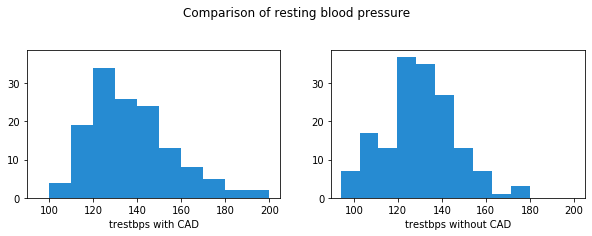

In [46]:
sideplot(df, "trestbps", kind="hist", title="Comparison of resting blood pressure")

__Age__

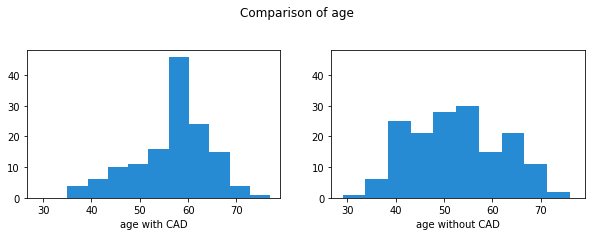

In [47]:
sideplot(df, "age", kind="hist", title="Comparison of age")

__Sex__<br>
There are more than twice as many male patients in the data set than female patients.

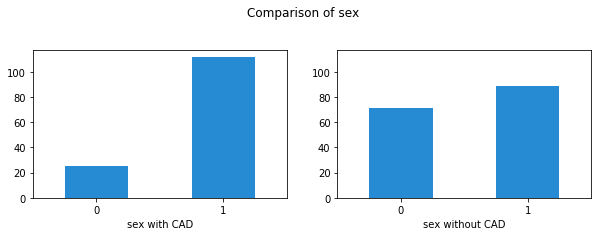

In [48]:
sideplot(df, "sex", kind="bar", title="Comparison of sex")

In [49]:
df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

__thal__<br>

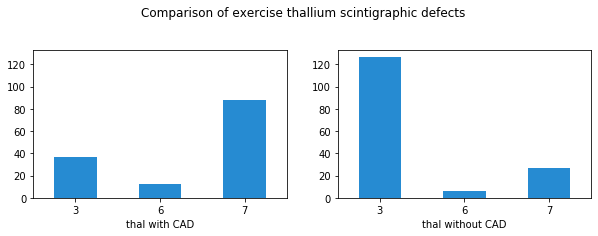

In [50]:
sideplot(df, "thal", kind="bar", title="Comparison of exercise thallium scintigraphic defects")

__Slope of the peak exercise ST segment__

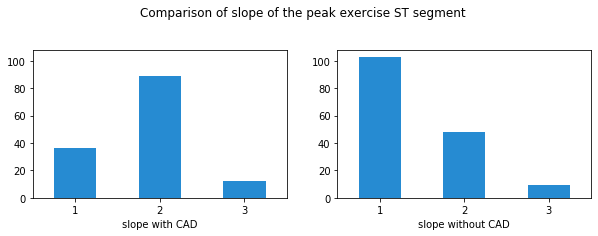

In [51]:
sideplot(df, "slope", kind="bar", title="Comparison of slope of the peak exercise ST segment")

__Number of major vessels colored by fluorosopy__

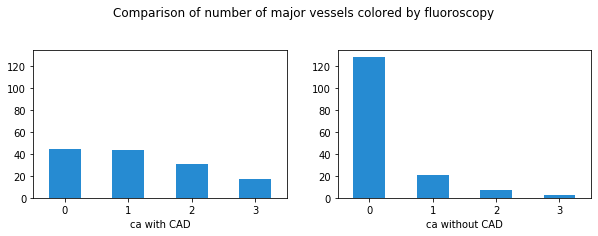

In [52]:
sideplot(df, "ca", kind="bar", title="Comparison of number of major vessels colored by fluoroscopy")

__Maximum heart rate achieved__

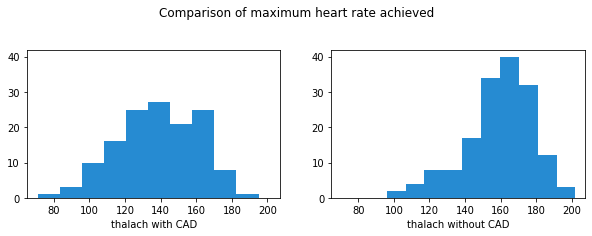

In [53]:
sideplot(df, "thalach", kind="hist", title="Comparison of maximum heart rate achieved")

__ST depression induced by exercise relative to rest__<br>
In exercise, the heart will consume more oxygen and nutrient, which can introduce shortage of blood transmitted to the heart by coronary arteries.

As we learned above, if myocardium lack blood for a long time, the cells in myocardium will be damaged, which can result in depression in ST segment. This feature will expose some not-easy-to-detect heart diseases.

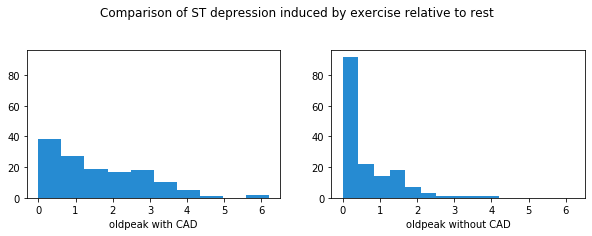

In [54]:
sideplot(df, "oldpeak", kind="hist", title="Comparison of ST depression induced by exercise relative to rest"
        )

__Chest pain type__<br>
Present research 1, 2 shows that the number of patients with typical angina are not significantly different from that with atypical angina and non-anginal pain.

It seems that patients with atypical angina and non-anginal pain are more likely to have a heart disease here, which are contradict with the research results, may come from the following reasons:

The result may be true due to lack of data (we only have 306 records here).
Indeed atypical angina and non-anginal pain are more likely to have a heart disease.

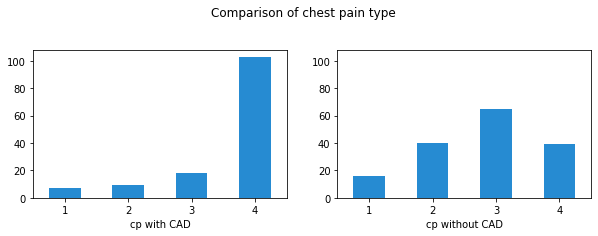

In [55]:
sideplot(df, "cp", kind="bar", title="Comparison of chest pain type")

__Exercise induced angina__

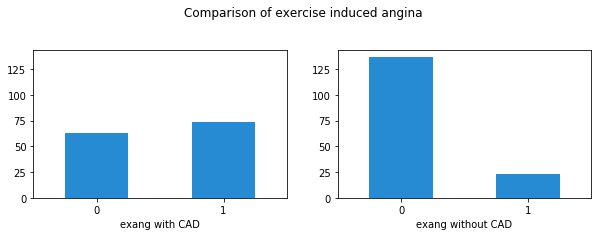

In [56]:
sideplot(df, "exang", kind="bar", title="Comparison of exercise induced angina")

## Preprocessing

__Linear discriminant analysis__<br>
Predicting how well the classification model can perform by using linear discriminant analysis (or LDA).
The LDA process similarly as PCA by reducing dimensions of the data, but it tends to make data with different labels most discriminable.

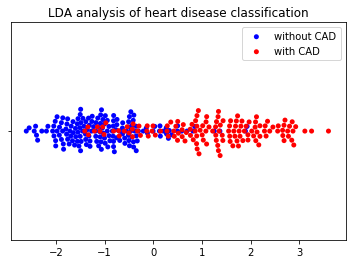

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline
clf = LDA(n_components=1)

y = df["num"].values
X = clf.fit(df[df.columns[:-1]].values, y).transform(df[df.columns[:-1]].values)
X = X[:, 0]

sns.swarmplot(X[y == 0], color="b", label="without CAD")
sns.swarmplot(X[y == 1], color="r", label="with CAD")
plt.title("LDA analysis of heart disease classification")
plt.legend()
plt.show()

We can see from the LDA graph above that the labelled data are approximately separable.
It seems the model we are going to train will have a comparably good performance.<br>

__Dummy encoding__<br>
Before training the classifier:
- Encode the enum-like features, as non-continuous values should not be considered as continuous ones, since they can have some bad effect on the final result

In [0]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['restecg'], prefix = "restecg")

In [59]:
frames = [df, a, b, c, d]
new_df = pd.concat(frames, axis = 1)
new_df = new_df.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
new_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1,67,1,160,286,0,108,1,1.5,3,1,0,0,0,1,1,0,0,0,1,0,0,0,1
2,67,1,120,229,0,129,1,2.6,2,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


__Outlier analysis__<br>
PCA will try to maximize the variance of data.

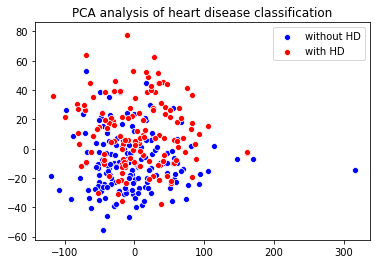

In [60]:
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
data_cols = [col for col in new_df.columns if col != "num"]
X = new_df[data_cols]
y = new_df["num"]
X_trans = clf.fit(X, y).transform(X)
sns.scatterplot(X_trans[y == 0][:, 0], X_trans[y == 0][:, 1], color="b", label="without HD")
sns.scatterplot(X_trans[y == 1][:, 0], X_trans[y == 1][:, 1], color="r", label="with HD")
plt.title("PCA analysis of heart disease classification")
plt.legend()
plt.show()

There are outliers at about (310, -20) and potentially also around (150, -10).<br>
If the model will be greatly affected by outliers sklearn.covariance.EllipticEnvelope could be used to drop them.

## Train Neural Network

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

new_df_shfl = shuffle(new_df, random_state=443)
X = new_df_shfl[data_cols].values
y = new_df_shfl["num"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=80)


In [0]:
num_epochs = 5000
log_inteval = 250
total_losses = []
total_val_losses = []
lr = 1e-4
lr_decay_inteval = 2500
lr_decay_rate = 0.3

In [63]:
import torch
from torch import nn, optim
model = nn.Sequential(
    nn.Linear(len(data_cols), 80),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(80, 256),
    nn.ReLU(),
    nn.Dropout(0.6),
    nn.Linear(256, 1),
)
loss_fn = torch.nn.BCELoss()
opt = optim.Adam(model.parameters(), lr=lr)

def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight, 0.06)

model.apply(init_normal)

Sequential(
  (0): Linear(in_features=22, out_features=80, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=80, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.6, inplace=False)
  (6): Linear(in_features=256, out_features=1, bias=True)
)

In [64]:
for epoch in range(1, num_epochs+1):
    y_pred = model(torch.tensor(X_train, dtype=torch.float))
    y_pred = torch.sigmoid(y_pred)
    opt.zero_grad()
    loss = loss_fn(y_pred[:, 0], torch.tensor(y_train, dtype=torch.float))
    loss.backward()
    opt.step()
    total_losses.append(loss.item())
    if epoch % log_inteval == 0: # Logging
        epochs_ran = epoch
        model.eval()
        with torch.no_grad():
            y_pred = model(torch.tensor(X_test, dtype=torch.float))
            y_pred = torch.sigmoid(y_pred)
            val_loss = loss_fn(y_pred[:, 0], torch.tensor(y_test, dtype=torch.float))
            total_val_losses.append(val_loss.item())
        model.train()
        print("total loss in epoch {} = {}, validation loss = {}, lr = {}".format(epoch, '%.4f'%loss, '%.4f'%val_loss, '%.2e'%lr))
        if len(total_val_losses) > 3 and val_loss.item() > total_val_losses[-2] and val_loss.item() > total_val_losses[-3]:
            print("Validation loss not improving for {} epochs, stopping...".format(log_inteval*2))
            break
    if epoch % lr_decay_inteval == 0: # Learning rate decay
        lr *= lr_decay_rate
        for param_group in opt.param_groups:
            param_group['lr'] = lr

total loss in epoch 250 = 0.5388, validation loss = 0.5277, lr = 1.00e-04
total loss in epoch 500 = 0.4292, validation loss = 0.4202, lr = 1.00e-04
total loss in epoch 750 = 0.3240, validation loss = 0.3303, lr = 1.00e-04
total loss in epoch 1000 = 0.2821, validation loss = 0.2885, lr = 1.00e-04
total loss in epoch 1250 = 0.2454, validation loss = 0.2545, lr = 1.00e-04
total loss in epoch 1500 = 0.2295, validation loss = 0.2265, lr = 1.00e-04
total loss in epoch 1750 = 0.2067, validation loss = 0.2122, lr = 1.00e-04
total loss in epoch 2000 = 0.1886, validation loss = 0.1966, lr = 1.00e-04
total loss in epoch 2250 = 0.1557, validation loss = 0.1854, lr = 1.00e-04
total loss in epoch 2500 = 0.1581, validation loss = 0.1877, lr = 1.00e-04
total loss in epoch 2750 = 0.1560, validation loss = 0.1757, lr = 3.00e-05
total loss in epoch 3000 = 0.1537, validation loss = 0.1726, lr = 3.00e-05
total loss in epoch 3250 = 0.1283, validation loss = 0.1720, lr = 3.00e-05
total loss in epoch 3500 = 0

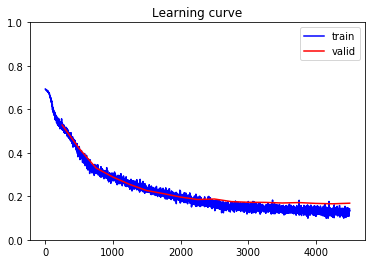

In [65]:
plt.plot(total_losses, 'b', label="train")
plt.plot(np.array(range(epochs_ran // log_inteval)) * log_inteval + log_inteval, total_val_losses, 'r', label="valid")
plt.ylim([0, 1])
plt.title("Learning curve")
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
with torch.no_grad():
    model.eval()
    y_pred = model(torch.tensor(X_test, dtype=torch.float))
    y_pred_lbl = np.where(y_pred.numpy() > 0, 1, 0)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lbl), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[0, 0] + cm.iloc[1, 1]) / float(cm.values.sum()) * 100))
cm


Accuracy = 95.00%


,T,F
P,32,2
N,1,25


## Gradient boost
Lightgbm instead uses gradient boost to train a decision tree model.

In [0]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [68]:
params = {
    "num_iterations": 1000,
    "num_leaves": 63,
    "max_depth": 7,
    "max_bin": 500,
    "learning_rate": 0.001,
    "min_data_in_leaf": 1,
    "objective": "binary",
    "metric": ["binary"],
}

bst = lgb.train(params, lgb_train, valid_sets=[lgb_valid], early_stopping_rounds=50, verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's binary_logloss: 0.648197
[200]	valid_0's binary_logloss: 0.613811
[300]	valid_0's binary_logloss: 0.588286
[400]	valid_0's binary_logloss: 0.570185
[500]	valid_0's binary_logloss: 0.561455
[600]	valid_0's binary_logloss: 0.557171
[700]	valid_0's binary_logloss: 0.556717
Early stopping, best iteration is:
[663]	valid_0's binary_logloss: 0.556469


In [69]:
y_pred = bst.predict(X_test)
y_pred_lbl = np.where(y_pred > 0.5, 1, 0)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lbl), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[0, 0] + cm.iloc[1, 1]) / float(cm.values.sum()) * 100))
cm


Accuracy = 95.00%


,T,F
P,31,3
N,0,26
